In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리

In [5]:
# 데이터 불러오기
single = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/1인 가구/1인가구비율_시도_시_군_구__20240111164119.csv', encoding='cp949')
single.head(3)

,행정구역별,2015,2015.1,2015.2,2016,2016.1,2016.2,2017,2017.1,2017.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,행정구역별,1인가구비율<br>(A÷B×100) (%),1인가구<br>(A) (가구),일반가구<br>(B) (가구),1인가구비율<br>(A÷B×100) (%),1인가구<br>(A) (가구),일반가구<br>(B) (가구),1인가구비율<br>(A÷B×100) (%),1인가구<br>(A) (가구),일반가구<br>(B) (가구),...,일반가구<br>(B) (가구),1인가구비율<br>(A÷B×100) (%),1인가구<br>(A) (가구),일반가구<br>(B) (가구),1인가구비율<br>(A÷B×100) (%),1인가구<br>(A) (가구),일반가구<br>(B) (가구),1인가구비율<br>(A÷B×100) (%),1인가구<br>(A) (가구),일반가구<br>(B) (가구)
1,전국,27.2,5203440,19111030,27.9,5397615,19367696,28.6,5618677,19673875,...,20343188,31.7,6643354,20926710,33.4,7165788,21448463,34.5,7502350,21773507
2,서울특별시,29.5,1115744,3784490,30.1,1138860,3784705,31.0,1180540,3813260,...,3896389,34.9,1390701,3982290,36.8,1489893,4046799,38.2,1564187,4098818


In [6]:
# 열 이름 변경
single.columns = ['행정구역', '1인가구 비율_2015', '1인가구_2015', '일반가구_2015', '1인가구 비율_2016', '1인가구_2016', '일반가구_2016',
                                '1인가구 비율_2017', '1인가구_2017', '일반가구_2017', '1인가구 비율_2018', '1인가구_2018', '일반가구_2018',
                                '1인가구 비율_2019', '1인가구_2019', '일반가구_2019', '1인가구 비율_2020', '1인가구_2020', '일반가구_2020',
                                '1인가구 비율_2021', '1인가구_2021', '일반가구_2021', '1인가구 비율_2022', '1인가구_2022', '일반가구_2022']

re_single = single.drop([0], axis = 0)
re_single.head(3)

,행정구역,1인가구 비율_2015,1인가구_2015,일반가구_2015,1인가구 비율_2016,1인가구_2016,일반가구_2016,1인가구 비율_2017,1인가구_2017,일반가구_2017,...,일반가구_2019,1인가구 비율_2020,1인가구_2020,일반가구_2020,1인가구 비율_2021,1인가구_2021,일반가구_2021,1인가구 비율_2022,1인가구_2022,일반가구_2022
1,전국,27.2,5203440,19111030,27.9,5397615,19367696,28.6,5618677,19673875,...,20343188,31.7,6643354,20926710,33.4,7165788,21448463,34.5,7502350,21773507
2,서울특별시,29.5,1115744,3784490,30.1,1138860,3784705,31.0,1180540,3813260,...,3896389,34.9,1390701,3982290,36.8,1489893,4046799,38.2,1564187,4098818
3,부산광역시,27.1,361749,1335900,27.7,372412,1344170,28.7,388899,1354401,...,1377030,32.4,455207,1405037,34.0,487362,1431365,35.3,511745,1447825


In [7]:
re_single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 1 to 18
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   행정구역          18 non-null     object
 1   1인가구 비율_2015  18 non-null     object
 2   1인가구_2015     18 non-null     object
 3   일반가구_2015     18 non-null     object
 4   1인가구 비율_2016  18 non-null     object
 5   1인가구_2016     18 non-null     object
 6   일반가구_2016     18 non-null     object
 7   1인가구 비율_2017  18 non-null     object
 8   1인가구_2017     18 non-null     object
 9   일반가구_2017     18 non-null     object
 10  1인가구 비율_2018  18 non-null     object
 11  1인가구_2018     18 non-null     object
 12  일반가구_2018     18 non-null     object
 13  1인가구 비율_2019  18 non-null     object
 14  1인가구_2019     18 non-null     object
 15  일반가구_2019     18 non-null     object
 16  1인가구 비율_2020  18 non-null     object
 17  1인가구_2020     18 non-null     object
 18  일반가구_2020     18 non-null     object
 19  1인가구 비율_20

In [8]:
# '행정구역'을 제외한 나머지 열 리스트 설정
columns_to_process = [col for col in re_single.columns if col != '행정구역']

# 문자열을 숫자로 변환
re_single[columns_to_process] = re_single[columns_to_process].apply(pd.to_numeric)
re_single.head(3)

,행정구역,1인가구 비율_2015,1인가구_2015,일반가구_2015,1인가구 비율_2016,1인가구_2016,일반가구_2016,1인가구 비율_2017,1인가구_2017,일반가구_2017,...,일반가구_2019,1인가구 비율_2020,1인가구_2020,일반가구_2020,1인가구 비율_2021,1인가구_2021,일반가구_2021,1인가구 비율_2022,1인가구_2022,일반가구_2022
1,전국,27.2,5203440,19111030,27.9,5397615,19367696,28.6,5618677,19673875,...,20343188,31.7,6643354,20926710,33.4,7165788,21448463,34.5,7502350,21773507
2,서울특별시,29.5,1115744,3784490,30.1,1138860,3784705,31.0,1180540,3813260,...,3896389,34.9,1390701,3982290,36.8,1489893,4046799,38.2,1564187,4098818
3,부산광역시,27.1,361749,1335900,27.7,372412,1344170,28.7,388899,1354401,...,1377030,32.4,455207,1405037,34.0,487362,1431365,35.3,511745,1447825


In [9]:
# 2015년 데이터만 추출
data_15 = re_single[['행정구역'] + [col for col in re_single.columns if '2015' in col]]
data_15['시점'] = '2015'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2015':'1인가구 비율', '1인가구_2015':'1인가구 수', '일반가구_2015':'일반가구 수', '시점': '시점'}

data_15 = data_15.rename(columns=new_columns)
data_15_drop = data_15.dropna(axis=0)
data_15_drop.head(3)

<ipython-input-9-7dc2cd8bbc6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_15['시점'] = '2015'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,27.2,5203440,19111030,2015
2,서울특별시,29.5,1115744,3784490,2015
3,부산광역시,27.1,361749,1335900,2015


In [10]:
# 2016년 데이터만 추출
data_16= re_single[['행정구역'] + [col for col in re_single.columns if '2016' in col]]
data_16['시점'] = '2016'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2016':'1인가구 비율', '1인가구_2016':'1인가구 수', '일반가구_2016':'일반가구 수', '시점': '시점'}

data_16 = data_16.rename(columns=new_columns)
data_16_drop = data_16.dropna(axis=0)
data_16_drop.head(3)

<ipython-input-10-5b209a7f3426>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_16['시점'] = '2016'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,27.9,5397615,19367696,2016
2,서울특별시,30.1,1138860,3784705,2016
3,부산광역시,27.7,372412,1344170,2016


In [11]:
# 2017년 데이터만 추출
data_17= re_single[['행정구역'] + [col for col in re_single.columns if '2017' in col]]
data_17['시점'] = '2017'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2017':'1인가구 비율', '1인가구_2017':'1인가구 수', '일반가구_2017':'일반가구 수', '시점': '시점'}

data_17 = data_17.rename(columns=new_columns)
data_17_drop = data_17.dropna(axis=0)
data_17_drop.head(3)

<ipython-input-11-5fbca06754cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_17['시점'] = '2017'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,28.6,5618677,19673875,2017
2,서울특별시,31.0,1180540,3813260,2017
3,부산광역시,28.7,388899,1354401,2017


In [12]:
# 2018년 데이터만 추출
data_18= re_single[['행정구역'] + [col for col in re_single.columns if '2018' in col]]
data_18['시점'] = '2018'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2018':'1인가구 비율', '1인가구_2018':'1인가구 수', '일반가구_2018':'일반가구 수', '시점': '시점'}

data_18 = data_18.rename(columns=new_columns)
data_18_drop = data_18.dropna(axis=0)
data_18_drop.head(3)

<ipython-input-12-dfeb7734cf12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_18['시점'] = '2018'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,29.3,5848594,19979188,2018
2,서울특별시,32.0,1229421,3839766,2018
3,부산광역시,29.7,404408,1363608,2018


In [13]:
# 2019년 데이터만 추출
data_19= re_single[['행정구역'] + [col for col in re_single.columns if '2019' in col]]
data_19['시점'] = '2019'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2019':'1인가구 비율', '1인가구_2019':'1인가구 수', '일반가구_2019':'일반가구 수', '시점': '시점'}

data_19 = data_19.rename(columns=new_columns)
data_19_drop = data_19.dropna(axis=0)
data_19_drop.head(3)

<ipython-input-13-f5a11194d0c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19['시점'] = '2019'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,30.2,6147516,20343188,2019
2,서울특별시,33.4,1299787,3896389,2019
3,부산광역시,30.7,423227,1377030,2019


In [14]:
# 2020년 데이터만 추출
data_20= re_single[['행정구역'] + [col for col in re_single.columns if '2020' in col]]
data_20['시점'] = '2020'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2020':'1인가구 비율', '1인가구_2020':'1인가구 수', '일반가구_2020':'일반가구 수', '시점': '시점'}

data_20 = data_20.rename(columns=new_columns)
data_20_drop = data_20.dropna(axis=0)
data_20_drop.head(3)

<ipython-input-14-48465d07769d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20['시점'] = '2020'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,31.7,6643354,20926710,2020
2,서울특별시,34.9,1390701,3982290,2020
3,부산광역시,32.4,455207,1405037,2020


In [15]:
# 2021년 데이터만 추출
data_21= re_single[['행정구역'] + [col for col in re_single.columns if '2021' in col]]
data_21['시점'] = '2021'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2021':'1인가구 비율', '1인가구_2021':'1인가구 수', '일반가구_2021':'일반가구 수', '시점': '시점'}

data_21 = data_21.rename(columns=new_columns)
data_21_drop = data_21.dropna(axis=0)
data_21_drop.head(3)

<ipython-input-15-856071d51340>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_21['시점'] = '2021'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,33.4,7165788,21448463,2021
2,서울특별시,36.8,1489893,4046799,2021
3,부산광역시,34.0,487362,1431365,2021


In [16]:
# 2022년 데이터만 추출
data_22= re_single[['행정구역'] + [col for col in re_single.columns if '2022' in col]]
data_22['시점'] = '2022'
new_columns = {'행정구역': '행정구역', '1인가구 비율_2022':'1인가구 비율', '1인가구_2022':'1인가구 수', '일반가구_2022':'일반가구 수', '시점': '시점'}

data_22 = data_22.rename(columns=new_columns)
data_22_drop = data_22.dropna(axis=0)
data_22_drop.head(3)

<ipython-input-16-b78fe08606dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22['시점'] = '2022'


,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,34.5,7502350,21773507,2022
2,서울특별시,38.2,1564187,4098818,2022
3,부산광역시,35.3,511745,1447825,2022


In [17]:
# 데이터 통합
single_last = pd.concat([data_15_drop, data_16_drop, data_17_drop, data_18_drop, data_19_drop, data_20_drop, data_21_drop, data_22_drop])
single_last.head(3)

,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,27.2,5203440,19111030,2015
2,서울특별시,29.5,1115744,3784490,2015
3,부산광역시,27.1,361749,1335900,2015


# 현황분석

In [18]:
single_last.columns

Index(['행정구역', '1인가구 비율', '1인가구 수', '일반가구 수', '시점'], dtype='object')

In [19]:
single_last['시점'].unique()

array(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [20]:
single_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 18
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역     144 non-null    object 
 1   1인가구 비율  144 non-null    float64
 2   1인가구 수   144 non-null    int64  
 3   일반가구 수   144 non-null    int64  
 4   시점       144 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.8+ KB


In [21]:
# 전국데이터만 추출
nationwide_single = single_last[single_last['행정구역'] == '전국']
nationwide_single.head(3)

,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
1,전국,27.2,5203440,19111030,2015
1,전국,27.9,5397615,19367696,2016
1,전국,28.6,5618677,19673875,2017


In [22]:
# 전국데이터제외 데이터 추출
area_single = single_last[single_last['행정구역'] != '전국']
area_single.head(3)

,행정구역,1인가구 비율,1인가구 수,일반가구 수,시점
2,서울특별시,29.5,1115744,3784490,2015
3,부산광역시,27.1,361749,1335900,2015
4,대구광역시,25.8,239517,928528,2015


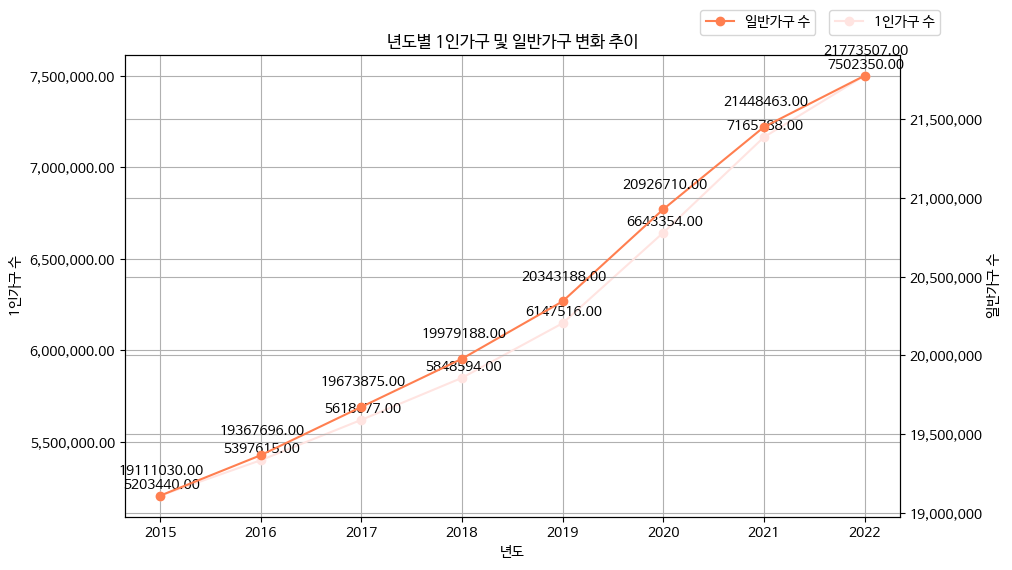

In [23]:
# 시점별 1인가구 및 일반가구 비교
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(nationwide_single['시점'], nationwide_single['1인가구 수'], marker='o', label='1인가구 수', color='mistyrose')
ax1.set_xlabel('년도')
ax1.set_ylabel('1인가구 수', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', bbox_to_anchor=(0.9, 1.1121))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))

ax2 = ax1.twinx()
ax2.plot(nationwide_single['시점'], nationwide_single['일반가구 수'], marker='o', label='일반가구 수', color='coral')
ax2.set_ylabel('일반가구 수', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1.1121))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

for i, txt in enumerate(nationwide_single['1인가구 수']):
    ax1.annotate(f'{txt:.2f}', (nationwide_single['시점'].iloc[i], nationwide_single['1인가구 수'].iloc[i]), textcoords="offset points", xytext=(1, 5), ha='center')
for i, txt in enumerate(nationwide_single['일반가구 수']):
    ax2.annotate(f'{txt:.2f}', (nationwide_single['시점'].iloc[i], nationwide_single['일반가구 수'].iloc[i]), textcoords="offset points", xytext=(1, 15), ha='center')

ax1.grid(True)
ax2.grid(True)

plt.title('년도별 1인가구 및 일반가구 변화 추이')
plt.show()

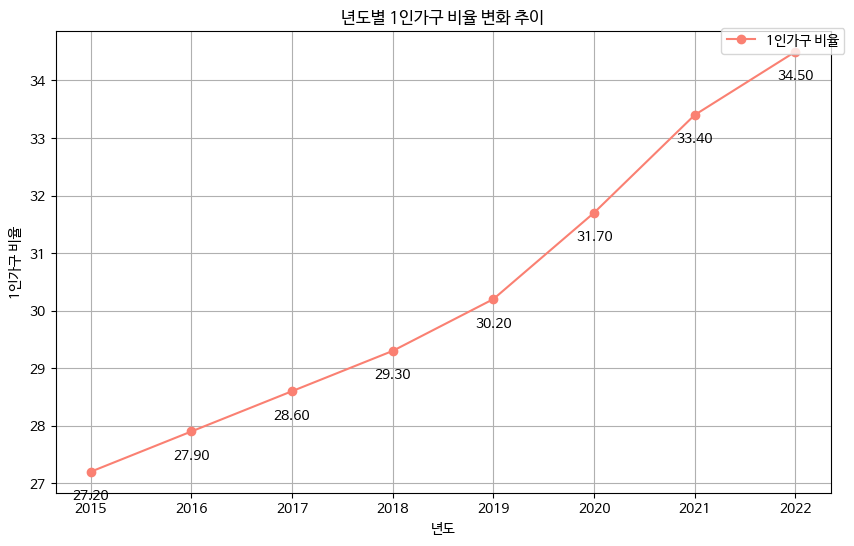

In [24]:
# 시점별 1인가구 비율

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(nationwide_single['시점'], nationwide_single['1인가구 비율'], marker='o', label='1인가구 비율', color='salmon')
ax1.set_xlabel('년도')
ax1.set_ylabel('1인가구 비율', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', bbox_to_anchor=(0.85, 1.02))

for i, txt in enumerate(nationwide_single['1인가구 비율']):
    ax1.annotate(f'{txt:.2f}', (nationwide_single['시점'].iloc[i], nationwide_single['1인가구 비율'].iloc[i]), textcoords="offset points", xytext=(0, -20), ha='center')

plt.grid(True)
plt.title('년도별 1인가구 비율 변화 추이')
plt.show()